<a href="https://colab.research.google.com/github/PriscillaMuli/-Security-Crime-Analysis-in-India-SQL-Python-Analysis./blob/main/Security_Crime_Analysis_in_India_SQL_%26_Python_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Project Objective**

**1.1 Defining the Question**

The objective of the project is the analysis on crime rates in India, giving further insights to the government - police, security companies which can be useful to improving their services. Citizens of India can benefit from this analysis too as the analysis can result in higher security levels and lower crime rates in the country.

**1.2 Defining the Metric for Success**

Metric of success for this project is the thorough analysis of crime rates in India through use of exploratory data analysis.

**1.3 Context Understanding**

An analysis of crime backed up with data is beneficial to India as a whole to reduce the increasing crime levels.





**1.4 Recording the Experimental Design**

The following are the steps we are going to follow:

1. Data importation - loading the dataset with appropriate libraries to use

2. Data Cleaning - do the needed steps to clean the data

3. Exploratory Data Analysis - univariate and bivariate data analysis

4. Evaluation and recommendations - comment on each tested model's suitability in solving the problem

5. Conclusion - final remarks on the project

**1.5 Data Relevance**

The data provided was found to be suitable for this data analysis considering the question given.

#**2. Data Importation**

In [ ]:
# import relevant libraries
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
# install sql to be used on pandas
!pip install pandasql
from pandasql import sqldf
import pandas as pd

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=bd48127d2ca018731ac4a8f95f2faf6f23810b980bd9d761a6e3d9385b9c4edf
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [ ]:
# Read csv files  data
df=pd.read_csv('Murder_victim_age_sex.csv')  
df.head() 

,Area_Name,Year,Group_Name,Sub_Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,Andaman & Nicobar Islands,2001,Murder - Female Victims,2. Female Victims,NaN,6,NaN,NaN,NaN,4.0,2.0
1,Andhra Pradesh,2001,Murder - Female Victims,2. Female Victims,67.0,607,15.0,38.0,43.0,269.0,175.0
2,Arunachal Pradesh,2001,Murder - Female Victims,2. Female Victims,2.0,16,0.0,0.0,0.0,10.0,4.0
3,Assam,2001,Murder - Female Victims,2. Female Victims,11.0,128,8.0,4.0,23.0,45.0,37.0
4,Bihar,2001,Murder - Female Victims,2. Female Victims,12.0,366,0.0,0.0,40.0,191.0,123.0


#**3. Data Cleaning**

**3.1 Completeness**

In [ ]:
# find and fill Nan values
df.fillna(0, inplace=True)
df.head(20)

,Area_Name,Year,Group_Name,Sub_Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,Andaman & Nicobar Islands,2001,Murder - Female Victims,2. Female Victims,0.0,6,0.0,0.0,0.0,4.0,2.0
1,Andhra Pradesh,2001,Murder - Female Victims,2. Female Victims,67.0,607,15.0,38.0,43.0,269.0,175.0
2,Arunachal Pradesh,2001,Murder - Female Victims,2. Female Victims,2.0,16,0.0,0.0,0.0,10.0,4.0
3,Assam,2001,Murder - Female Victims,2. Female Victims,11.0,128,8.0,4.0,23.0,45.0,37.0
4,Bihar,2001,Murder - Female Victims,2. Female Victims,12.0,366,0.0,0.0,40.0,191.0,123.0
5,Chandigarh,2001,Murder - Female Victims,2. Female Victims,3.0,5,0.0,0.0,0.0,1.0,1.0
6,Chhattisgarh,2001,Murder - Female Victims,2. Female Victims,63.0,549,14.0,38.0,38.0,214.0,182.0
7,Delhi,2001,Murder - Female Victims,2. Female Victims,14.0,152,2.0,12.0,9.0,74.0,41.0
8,Goa,2001,Murder - Female Victims,2. Female Victims,1.0,13,0.0,0.0,0.0,4.0,8.0
9,Gujarat,2001,Murder - Female Victims,2. Female Victims,26.0,363,9.0,57.0,8.0,132.0,131.0


#**4. Exploratory Data Analysis - Visualizations**

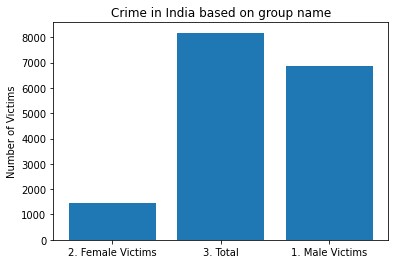

In [ ]:
# Plot a chart which shows based on group name crime in India 
import matplotlib.pyplot as plt
plt.bar(df['Sub_Group_Name'],df['Victims_Total'])  
plt.title('Crime in India based on group name')
#plt.xlabel('Group')
plt.ylabel('Number of Victims')
plt.show()

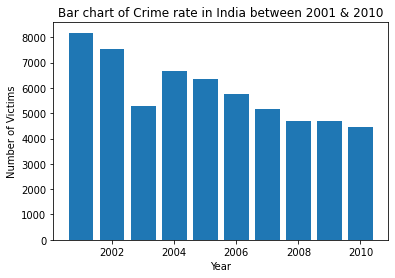

In [ ]:
# Plot a bar chart which shows crime rate in India between 2001 and 2010
import matplotlib.pyplot as plt
plt.bar(df['Year'],df['Victims_Total'])  
plt.title('Bar chart of Crime rate in India between 2001 & 2010')
plt.xlabel('Year')
plt.ylabel('Number of Victims')
plt.show()

#**4. DATA ANALYTICS**


In [ ]:
# Arrange the data in ascending total victims order
df = df.sort_values('Victims_Total') 
df.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
243,Daman & Diu,2008,Murder - Female Victims,2. Female Victims,0.0,0,0.0,0.0,0.0,0.0,0.0
169,Arunachal Pradesh,2006,Murder - Female Victims,2. Female Victims,0.0,0,0.0,0.0,0.0,0.0,0.0
68,Arunachal Pradesh,2003,Murder - Female Victims,2. Female Victims,0.0,0,0.0,0.0,0.0,0.0,0.0
74,Daman & Diu,2003,Murder - Female Victims,2. Female Victims,0.0,0,0.0,0.0,0.0,0.0,0.0
209,Daman & Diu,2007,Murder - Female Victims,2. Female Victims,0.0,1,0.0,0.0,0.0,1.0,0.0


In [ ]:
# yearly count of victims
from pandasql import sqldf
#sqldf('SELECT * from df where Year==2008')  
sqldf('select Year, SUM(Victims_Total) as total_victims from df group by Year') 

,Year,total_victims
0,2001,77272
1,2002,76066
2,2003,67642
3,2004,69830
4,2005,68838
5,2006,67616
6,2007,66856
7,2008,67454
8,2009,66318
9,2010,67816


In [ ]:
sqldf('Select * from df Order by Victims_Total DESC')    

,Area_Name,Year,Group_Name,Sub_Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,Uttar Pradesh,2001,Murder - Total Victims,3. Total,824.0,8180,158.0,39.0,292.0,3724.0,3143.0
1,Uttar Pradesh,2002,Murder - Total Victims,3. Total,566.0,7538,191.0,36.0,311.0,3548.0,2886.0
2,Uttar Pradesh,2001,Murder - Male Victims,1. Male Victims,722.0,6857,93.0,29.0,189.0,3098.0,2726.0
3,Uttar Pradesh,2004,Murder - Total Victims,3. Total,550.0,6665,218.0,116.0,347.0,2837.0,2597.0
4,Uttar Pradesh,2005,Murder - Total Victims,3. Total,554.0,6365,124.0,44.0,222.0,3120.0,2301.0
...,...,...,...,...,...,...,...,...,...,...,...
1013,Lakshadweep,2005,Murder - Total Victims,3. Total,0.0,1,0.0,0.0,0.0,1.0,0.0
1014,Daman & Diu,2008,Murder - Female Victims,2. Female Victims,0.0,0,0.0,0.0,0.0,0.0,0.0
1015,Arunachal Pradesh,2006,Murder - Female Victims,2. Female Victims,0.0,0,0.0,0.0,0.0,0.0,0.0
1016,Arunachal Pradesh,2003,Murder - Female Victims,2. Female Victims,0.0,0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# group victims based on gender
sqldf('select SUM(Victims_Total) as victims, Year, Group_Name from df Group by Group_Name')

,victims,Year,Group_Name
0,81580,2002,Murder - Female Victims
1,266274,2001,Murder - Male Victims
2,347854,2001,Murder - Total Victims


In [ ]:
# group victims based on area and gender
sqldf('select Area_Name, Victims_Total, Group_Name from df where Year ==2001')

,Area_Name,Victims_Total,Group_Name
0,Nagaland,2,Murder - Female Victims
1,Lakshadweep,2,Murder - Female Victims
2,Lakshadweep,2,Murder - Total Victims
3,Dadra & Nagar Haveli,3,Murder - Total Victims
4,Dadra & Nagar Haveli,3,Murder - Male Victims
...,...,...,...
95,Maharashtra,2950,Murder - Total Victims
96,Bihar,3277,Murder - Male Victims
97,Bihar,3643,Murder - Total Victims
98,Uttar Pradesh,6857,Murder - Male Victims


In [ ]:
# filter to the list of victims above 50 years of age
sqldf("Select Area_Name, Sub_Group_Name, Year, Victims_Above_50_Yrs from df Where Victims_Above_50_Yrs >= 200")

,Area_Name,Sub_Group_Name,Year,Victims_Above_50_Yrs
0,Chhattisgarh,3. Total,2007,227.0
1,Tamil Nadu,1. Male Victims,2007,228.0
2,Jharkhand,1. Male Victims,2002,238.0
3,Tamil Nadu,1. Male Victims,2008,234.0
4,Tamil Nadu,1. Male Victims,2009,246.0
...,...,...,...,...
92,Uttar Pradesh,3. Total,2005,554.0
93,Uttar Pradesh,3. Total,2004,550.0
94,Uttar Pradesh,1. Male Victims,2001,722.0
95,Uttar Pradesh,3. Total,2002,566.0


In [ ]:
# sum up victims for the year 2008
sqldf('select SUM(Victims_Total),Year from df where Year==2008')  

,SUM(Victims_Total),Year
0,67454,2008
